# Exercise: Linear Spectral Umixing

David R. Thompson, Jet Propulsion Laboratory, California Institute of Technology<br>
Contact: david.r.thompson@jpl.nasa.gov
__________

This exercise walks you through linear unmixing of remote surface reflectance data using a spectral library.  We import dependencies, and load the wavelengths, reflectances and library of endmembers.  Here the spectra are provided as lists rather than images.

In [3]:
import numpy as np
import pylab as plt
import figure_style
import os.path
from scipy.optimize import nnls

# Load the data - first column is the wavelength calibration
rfl = np.loadtxt(os.path.join('data','Citrus_Identification_Data.txt'), 
                 skiprows=1, delimiter=',')[:,3:]
wavelengths = np.loadtxt(os.path.join('data','Citrus_Identification_Wavelengths.txt'))
library = np.loadtxt(os.path.join('data','endmembers.txt'))

Unmix each spectrum in turn using the full library.  Save a representative example of the measured spectrum, the model, and the best-fitting components.

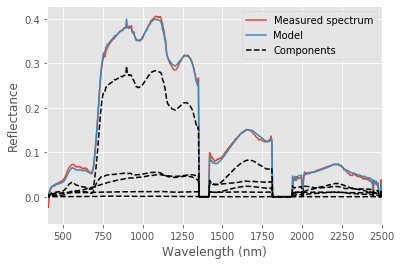

In [4]:
example = 999
for i in range(rfl.shape[0]):
    
    # Unmix! the coefficient vector gives us the areal occurrance fractions for each
    coeff, resid = nnls(library, np.squeeze(rfl[i,:]))
    
    # Plot the example result 
    if i==example:
        
        plt.plot(wavelengths, rfl[i,:])
        plt.plot(wavelengths, library.dot(coeff[:,np.newaxis]))
        for c in range(coeff.size):
            if coeff[c]>1e-6:
                plt.plot(wavelengths, library[:,c]*coeff[c],'k--')
        plt.xlim((400,2500))
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Reflectance')
        plt.legend(['Measured spectrum','Model','Components'])
        plt.savefig('fit.png');

<b> Question 1: </b> How does the residual spectrum fit error over the full dataset change as a function of the library size? 

<b> Question 2: </b> Which measurements are most responsible for the degradation, and why?

-------------
<b>Acknowledgements</b>: A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. We acknowledge the support of a PRISM AITT grant from the National Aeronautics and Space Administration (NASA) Earth Science Technology Office. We acknowledge the support of the JPL and Caltech Presidents’ and Directors’ Fund Program. We thank other supporting sponsors including the NASA Earth Science Division for the HyspIRI preparatory campaign, the AVIRIS-NG instrument and the data analysis program “Utilization of Airborne Visible/Infrared Imaging Spectrometer Next Generation Data from an Airborne Campaign in India” NNH16ZDA001N-AVRSNG, for its support of the algorithm development; the Jet Propulsion Laboratory Research and Technology Development Program; and the NASA Center Innovation Fund managed in conjunction with the Jet Propulsion Laboratory Office of the Chief Scientist and Technologist. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.